# Libraries
---

In [1]:
# manipulação do sistema operacional
import os

# Manipulate dataframes
import pandas as pd

# graphic plots
import matplotlib.pyplot as plt
import scipy.stats as stats

# Preprocessing
from sklearn.feature_selection import VarianceThreshold # feature variance
from sklearn.model_selection import train_test_split # divide dataset
from sklearn.preprocessing import MinMaxScaler # normalize numerical columns
from sklearn.impute import KNNImputer # impute missing data

# Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

C:\Users\Lucas\AppData\Local\Temp\ipykernel_10612\2309535090.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data
---

In [2]:
data = pd.read_csv('../data/Protein_Supply_Quantity_Data.csv').dropna(subset=['Deaths']) # perde-se 6 registros
data

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,...,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,...,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,...,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0000,10.5108,0.4850,8.2146,1.2586,16.0670,...,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.1955,22.5411,0.1244,0.0000,21.6526,0.8707,2.6477,1.0662,11.8347,...,1.0129,0.0267,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,0.1555,20.4466,0.1555,0.0056,18.5247,0.7665,5.7435,0.7165,11.0426,...,3.7216,0.0389,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0000,10.0122,0.0188,0.0000,35.1179,0.4320,0.9392,0.4884,5.9453,...,0.5448,0.0564,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,0.4824,9.8925,0.0338,0.0000,28.5182,0.5839,3.0126,0.0931,4.3158,...,0.8039,0.0592,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [3]:
data = data.reset_index(drop=True)
data

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,...,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,...,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,...,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0000,10.5108,0.4850,8.2146,1.2586,16.0670,...,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Venezuela (Bolivarian Republic of),0.1955,22.5411,0.1244,0.0000,21.6526,0.8707,2.6477,1.0662,11.8347,...,1.0129,0.0267,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
160,Vietnam,0.1555,20.4466,0.1555,0.0056,18.5247,0.7665,5.7435,0.7165,11.0426,...,3.7216,0.0389,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
161,Yemen,0.0000,10.0122,0.0188,0.0000,35.1179,0.4320,0.9392,0.4884,5.9453,...,0.5448,0.0564,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
162,Zambia,0.4824,9.8925,0.0338,0.0000,28.5182,0.5839,3.0126,0.0931,4.3158,...,0.8039,0.0592,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [4]:
data.Deaths.value_counts()

Deaths
0.000000    8
0.006186    1
0.097755    1
0.006784    1
0.082830    1
           ..
0.087995    1
0.073891    1
0.001445    1
0.055617    1
0.008854    1
Name: count, Length: 157, dtype: int64

In [5]:
data.isnull().sum().sum()

10

In [6]:
data['Deaths'].isnull().sum()

0

In [7]:
data.drop(labels='Unit (all except Population)',inplace=True, axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   164 non-null    object 
 1   Alcoholic Beverages       164 non-null    float64
 2   Animal Products           164 non-null    float64
 3   Animal fats               164 non-null    float64
 4   Aquatic Products, Other   164 non-null    float64
 5   Cereals - Excluding Beer  164 non-null    float64
 6   Eggs                      164 non-null    float64
 7   Fish, Seafood             164 non-null    float64
 8   Fruits - Excluding Wine   164 non-null    float64
 9   Meat                      164 non-null    float64
 10  Milk - Excluding Butter   164 non-null    float64
 11  Offals                    164 non-null    float64
 12  Oilcrops                  164 non-null    float64
 13  Pulses                    164 non-null    float64
 14  Spices    

In [9]:
# Verificando se a população está em porcentagem ou não
data.Population

0      38928000.0
1       2838000.0
2      44357000.0
3      32522000.0
4         98000.0
          ...    
159    28645000.0
160    96209000.0
161    29826000.0
162    18384000.0
163    14863000.0
Name: Population, Length: 164, dtype: float64

In [10]:
data.Undernourished.value_counts()

Undernourished
<2.5    44
16.5     3
6.2      3
7.9      2
13.4     2
        ..
15.2     1
10.2     1
10.5     1
3.7      1
51.3     1
Name: count, Length: 94, dtype: int64

In [11]:
# Substitui todos os valores <2.5 por 2.5
data['Undernourished'] = data['Undernourished'].replace('<2.5', 2.4)

In [12]:
data.Undernourished.value_counts()

Undernourished
2.4     44
16.5     3
6.2      3
7.9      2
13.4     2
        ..
15.2     1
10.2     1
10.5     1
3.7      1
51.3     1
Name: count, Length: 94, dtype: int64

# Missing Data
---

In [13]:
data.isnull().sum()

Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Miscellaneous               0
Obesity                     1
Undernourished              7
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      2
Population                  0
dtype: int64

In [14]:
data.columns[data.isnull().any()].tolist()

['Obesity', 'Undernourished', 'Active']

In [15]:
# Verificando colunas com mais da metade de campos não preenchidos
for coluna in data.columns:
    if ((data[coluna] == 0).sum()) > 82:
        print(f'A coluna *{coluna}* possui mais de 82 campos Nan')
        print('----'*20)

A coluna *Aquatic Products, Other* possui mais de 82 campos Nan
--------------------------------------------------------------------------------
A coluna *Sugar Crops* possui mais de 82 campos Nan
--------------------------------------------------------------------------------
A coluna *Sugar & Sweeteners* possui mais de 82 campos Nan
--------------------------------------------------------------------------------


In [16]:
(data['Aquatic Products, Other'] == 0).sum(), (data['Sugar Crops'] == 0).sum(), (data['Sugar & Sweeteners'] == 0).sum()

(139, 144, 101)

# Variance
---

In [17]:
# Variância = 1
data.Country.value_counts()

Country
Afghanistan    1
Nepal          1
New Zealand    1
Nicaragua      1
Niger          1
              ..
Germany        1
Ghana          1
Greece         1
Grenada        1
Zimbabwe       1
Name: count, Length: 164, dtype: int64

In [18]:
data.drop(labels='Country', inplace=True, axis=1)

In [19]:
features = data.drop(columns='Deaths')

In [20]:
var = VarianceThreshold(threshold=(.9 * (1 - .9)))
var

VarianceThreshold(threshold=0.08999999999999998)

In [21]:
features_selecionadas = var.fit_transform(features)

In [22]:
indices_features_selecionadas = var.get_support(indices=True)

In [23]:
indices_features_selecionadas

array([ 1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 19, 21, 23, 24,
       25, 26, 27, 28], dtype=int64)

In [24]:
new_data = pd.DataFrame(data=features_selecionadas, columns=features.columns[indices_features_selecionadas])
new_data['Deaths'] = data['Deaths']
new_data

,Animal Products,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,...,Stimulants,Vegetal Products,Vegetables,Obesity,Undernourished,Confirmed,Recovered,Active,Population,Deaths
0,9.7523,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,...,0.5546,40.2477,1.137,4.5,29.8,0.142134,0.123374,0.012574,38928000.0,0.006186
1,27.7469,14.2331,1.8069,0.6274,1.2757,7.6582,16.475,1.1084,0.3722,1.4555,...,0.2635,22.2552,3.2456,22.3,6.2,2.967301,1.792636,1.123714,2838000.0,0.050951
2,13.836,26.5633,1.2916,0.635,1.1624,3.5088,8.0616,0.3283,0.183,2.5509,...,0.4628,36.1694,3.1267,26.6,3.9,0.244897,0.167572,0.070767,44357000.0,0.006558
3,15.2311,20.3882,0.1756,5.4436,1.2754,7.6248,1.146,0.8133,2.1534,4.085,...,0.1017,34.7782,0.8133,6.8,25,0.061687,0.056808,0.003419,32522000.0,0.001461
4,33.1901,10.5108,0.485,8.2146,1.2586,16.067,7.4349,0.8534,0.7674,0.8841,...,0.4113,16.8161,1.6024,19.1,NaN,0.293878,0.190816,0.095918,98000.0,0.007143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,22.5411,21.6526,0.8707,2.6477,1.0662,11.8347,6.3083,0.7641,0.0444,1.9369,...,0.3287,27.4545,1.0129,25.2,21.2,0.452585,0.424399,0.023899,28645000.0,0.004287
160,20.4466,18.5247,0.7665,5.7435,0.7165,11.0426,1.0887,1.6442,3.7994,0.9387,...,0.5444,29.5617,3.7216,2.1,9.3,0.002063,0.001526,0.000501,96209000.0,0.000036
161,10.0122,35.1179,0.432,0.9392,0.4884,5.9453,1.963,0.7232,0.2254,2.9398,...,0.3193,39.9831,0.5448,14.1,38.9,0.007131,0.004788,0.000282,29826000.0,0.002062
162,9.8925,28.5182,0.5839,3.0126,0.0931,4.3158,1.0324,0.9139,8.0562,0.6431,...,0.0762,40.1117,0.8039,6.5,46.7,0.334133,0.290524,0.039045,18384000.0,0.004564


In [25]:
new_data.Deaths.isnull().sum()

0

In [26]:
new_data.columns

Index(['Animal Products', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood',
       'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Offals',
       'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants',
       'Vegetal Products', 'Vegetables', 'Obesity', 'Undernourished',
       'Confirmed', 'Recovered', 'Active', 'Population', 'Deaths'],
      dtype='object')

In [27]:
new_data['Animal Products'].value_counts()

Animal Products
9.7523     1
8.5877     1
28.5384    1
16.6679    1
7.6195     1
          ..
30.2658    1
12.1922    1
26.9807    1
30.3273    1
11.3443    1
Name: count, Length: 164, dtype: int64

# Train-Test Split
---

In [28]:
true_nan = new_data.isna().apply(lambda x: x.sum(), axis=1) > 0 

dados_nan =  new_data[true_nan]
dados_validos = new_data[~true_nan]

dados_nan.shape, dados_validos.shape

((10, 22), (154, 22))

In [29]:
dados_nan.Deaths

4      0.007143
10     0.044784
26     0.054203
29     0.097047
58     0.000885
119    0.099859
123    0.000000
124    0.009890
142    0.000038
143    0.000955
Name: Deaths, dtype: float64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(dados_validos, dados_validos['Deaths'], test_size=0.3, random_state=0)

In [31]:
x_train.drop(labels=['Deaths'], inplace=True, axis=1)
x_test.drop(labels=['Deaths'], inplace=True, axis=1)

In [32]:
x_train = pd.concat([x_train, dados_nan.drop(labels=['Deaths'],axis=1)], axis=0)
y_train = pd.concat([y_train, dados_nan['Deaths']], axis=0)

## Verificando linhas e colunas
---

In [33]:
x_train.shape, x_test.shape

((117, 21), (47, 21))

In [34]:
y_train.shape, y_test.shape

((117,), (47,))

## Verificando dados ausentes
---

In [35]:
x_train.isnull().sum().sum(), x_test.isnull().sum().sum()

(10, 0)

In [36]:
y_train.isnull().sum().sum(), y_test.isnull().sum().sum()

(0, 0)

# Normalization
---

## Numerical Columns
---

In [37]:
MMS = MinMaxScaler()

In [38]:
colunas_numericas_treino = x_train
colunas_numericas_teste = x_test

In [39]:
escala_treino = MMS.fit(colunas_numericas_treino)

In [40]:
data_scaled_train = escala_treino.transform(colunas_numericas_treino)
data_scaled_test = escala_treino.transform(colunas_numericas_teste)

In [41]:
data_scaled_train_df = pd.DataFrame(data_scaled_train, columns=colunas_numericas_treino.columns , index=colunas_numericas_treino.index)
data_scaled_train_df

,Animal Products,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,...,Starchy Roots,Stimulants,Vegetal Products,Vegetables,Obesity,Undernourished,Confirmed,Recovered,Active,Population
2,0.268427,0.665810,0.353716,0.031658,0.240355,0.120876,0.480994,0.117225,0.021514,0.139792,...,0.122817,0.232821,0.731690,0.605867,0.564516,0.030675,0.025444,0.019587,0.011599,0.031644
130,0.643241,0.406092,0.465050,0.058981,0.175914,0.479665,0.568011,0.359209,0.065759,0.054133,...,0.079998,0.288302,0.356907,0.325953,0.493088,0.067485,0.607603,0.000000,0.947698,0.004931
47,0.301961,0.681600,0.103376,0.048012,0.148792,0.379563,0.193960,0.401807,0.161784,0.101442,...,0.172116,0.068819,0.698120,0.125033,0.262673,0.372188,0.152443,0.121428,0.060991,0.000750
138,0.330526,0.568874,0.060921,0.009082,0.197307,0.239020,0.490716,0.323466,0.220057,0.275661,...,0.034613,0.122587,0.669150,0.361137,0.122120,0.361963,0.006998,0.005810,0.002246,0.031281
12,0.785803,0.159700,0.398805,0.367999,0.137224,0.629361,0.316460,0.208027,0.151790,0.145815,...,0.119033,0.178690,0.214074,0.270122,0.523041,0.030675,0.060719,0.054941,0.017647,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.645482,0.449565,0.508695,0.138352,0.098882,0.434302,0.540640,0.256445,0.011533,0.019893,...,0.133395,0.123677,0.354698,0.336134,0.414747,NaN,0.483315,0.506549,0.034855,0.002486
123,0.922588,0.111594,0.208678,0.283793,0.171078,0.904751,0.301445,0.408198,0.106043,0.124947,...,0.053055,0.056674,0.077418,0.141940,0.483871,NaN,0.007674,0.007792,0.001214,0.000000
124,0.856948,0.175981,0.151722,0.298226,0.152190,0.824924,0.279484,0.466757,0.105063,0.128054,...,0.049631,0.100685,0.143466,0.157027,0.407834,NaN,0.103598,0.056195,0.082856,0.000091
142,0.661407,0.183382,0.669961,0.246617,0.157332,0.668464,0.134400,0.199886,0.744376,0.051124,...,0.009775,0.177237,0.338425,0.550751,NaN,0.022495,0.000375,0.000417,0.000050,0.016825


In [42]:
data_scaled_test_df = pd.DataFrame(data_scaled_test, columns=colunas_numericas_teste.columns , index=colunas_numericas_teste.index)
data_scaled_test_df

,Animal Products,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,...,Starchy Roots,Stimulants,Vegetal Products,Vegetables,Obesity,Undernourished,Confirmed,Recovered,Active,Population
30,0.873211,0.109294,0.754277,0.325737,0.082326,0.741953,0.136090,1.116975,0.220913,0.017257,...,0.036192,0.193481,0.126865,0.719575,0.103687,0.124744,0.000712,0.000781,0.000021,1.001632
94,0.805996,0.210405,0.443129,0.197755,0.114459,0.629429,0.551022,0.101264,0.070824,0.056522,...,0.052363,0.313785,0.194169,0.610651,0.665899,0.000000,0.370174,0.355943,0.075392,0.000334
161,0.130844,0.969498,0.110258,0.048545,0.093523,0.239112,0.104783,0.258230,0.026778,0.161104,...,0.006775,0.158345,0.868868,0.078033,0.276498,0.746421,0.000709,0.000560,0.000046,0.021265
114,0.610855,0.269669,0.634757,0.044581,0.121713,0.591680,0.271464,0.778333,0.147892,0.192878,...,0.161353,1.332884,0.389046,0.139794,0.389401,0.169734,0.197279,0.182645,0.048416,0.005143
27,0.556912,0.036192,0.030588,0.131469,0.205237,0.693999,0.084630,0.788010,0.446507,0.305598,...,0.705132,0.193793,0.443292,0.107513,0.096774,1.169734,0.010713,0.011822,0.000139,0.003411
8,0.850051,0.189666,0.595587,0.098317,0.123107,0.613235,0.692818,0.189888,0.185359,0.013180,...,0.084161,0.369421,0.150048,0.278606,0.456221,0.000000,0.493072,0.525622,0.025149,0.006328
48,-0.069068,0.778238,0.015945,0.002326,0.012025,0.032295,0.119021,0.130543,0.099029,0.589003,...,0.204255,0.150768,1.069163,0.060084,0.034562,0.372188,0.012773,0.012768,0.001965,0.082042
112,0.527142,0.463623,0.199530,0.019451,0.049605,0.168151,0.889689,0.226380,0.291116,0.161713,...,0.039948,0.149315,0.472859,0.157968,0.131336,0.366053,0.026075,0.026994,0.002394,0.157771
61,0.150781,0.815151,0.064886,0.019041,0.204235,0.278695,0.118521,0.323502,0.156259,0.073236,...,0.161233,0.033787,0.849107,0.128734,0.140553,0.523517,0.014932,0.014721,0.002543,0.001338
129,0.156699,0.853637,0.097712,0.229003,0.037427,0.162337,0.050344,0.250339,0.285505,0.114808,...,0.044803,0.099647,0.843190,0.285352,0.122120,0.182004,0.017668,0.016260,0.004427,0.011921


# Imputation
---

In [43]:
imputer = KNNImputer(n_neighbors=5)

x_train_complete = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns, index=x_train.index)

In [44]:
x_train = x_train_complete

In [45]:
# Verificando a possibilidade de valores faltantes
x_train_complete.isnull().sum().sum()

0

# Regression
---

##  Tuning
---

In [46]:
neural_networks_regressor = MLPRegressor(random_state=0)

In [47]:
neural_networks_regressor.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [48]:
param_grid = {
    'max_iter': [200, 500, 1000],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'hidden_layer_sizes': [(100,), (50,50), (100,50)],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }

In [49]:
grid_search = GridSearchCV(estimator=neural_networks_regressor, param_grid=param_grid, n_jobs=-1, cv=5,scoring='r2')
grid_search.fit(x_train, y_train)

c:\Users\Lucas\OneDrive\Documents\COVID-19 Healthy Diet\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
135 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lucas\OneDrive\Documents\COVID-19 Healthy Diet\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lucas\OneDrive\Documents\COVID-19 Healthy Diet\.venv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=0), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [200, 500, 1000],
                         'solver': ['adam', 'sgd']},
             scoring='r2')

In [50]:
# Melhores hiperparâmetros
grid_search.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'max_iter': 200,
 'solver': 'adam'}

In [51]:
best_neural_networks_regressor = grid_search.best_estimator_
best_neural_networks_regressor

MLPRegressor(activation='tanh', random_state=0)

In [52]:
best_neural_networks_regressor.score(x_train,y_train)

-0.1337784638291717

In [53]:
best_neural_networks_regressor.score(x_test, y_test)

-0.24265287558017778

# Validation Metrics
---

In [54]:
predictions = best_neural_networks_regressor.predict(x_test)

In [55]:
y_test.mean()

0.043757252097203714

In [56]:
mean_absolute_error(y_test, predictions)

0.038823137054119626

In [57]:
mean_squared_error(y_test, predictions)

0.0029217595564372547

# Graphs
---

## Residual plot
---

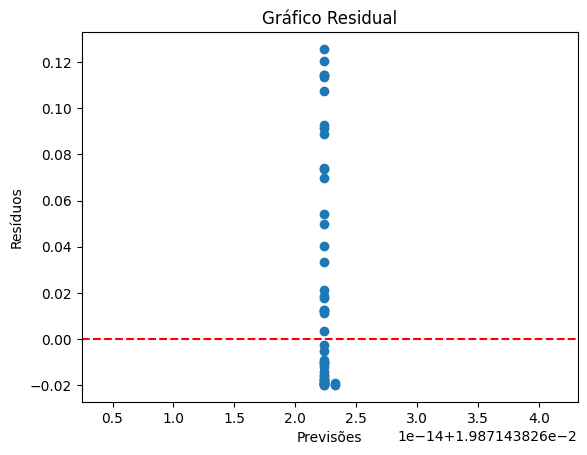

In [58]:
# Calcular os resíduos
residuals = y_test - predictions

# Plotar o gráfico residual
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico Residual')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

In [59]:
# Verifica se a pasta "gráficos" existe, se não, cria a pasta
if not os.path.exists('../Residual Plots'):
    os.makedirs('../Residual Plots')

# Salva a imagem na pasta "gráficos" dentro do diretório
plt.savefig(os.path.join('../Residual Plots', 'decision_tree_regression.png'))

<Figure size 640x480 with 0 Axes>

## Probability plot
---

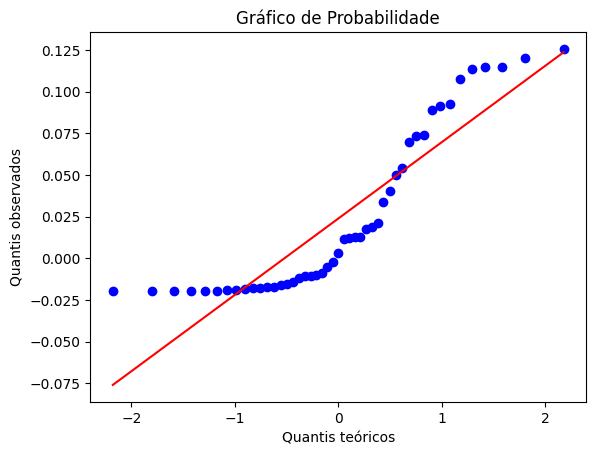

In [60]:
# Plotar o gráfico de probabilidade
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico de Probabilidade')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis observados')
plt.show()

In [61]:
# Verifica se a pasta "gráficos" existe, se não, cria a pasta
if not os.path.exists('../Probability Plots'):
    os.makedirs('../Probability Plots')

# Salva a imagem na pasta "gráficos" dentro do diretório
plt.savefig(os.path.join('../Probability Plots', 'decision_tree_regression.png'))

<Figure size 640x480 with 0 Axes>